# Background

In a study by Pew Research, participates were asked to choose which keywords they associate with their political opponents from a list.

# Method

We use synonyms of the keywords determined in this list to mark certain posts as "polarized".
As a sanity check, the "share" of each of the polarizing words will be compared to that of the Pew Research study.
We will then make the analysis more detailed, turning the polarization statistic from a nominal boolean to an ordinal *polarization index*.

# Implementation

## Data Collection

In [1]:
from collect import fetch

# collect sample data from r/politics
comments = fetch(limit=500)

# we only need the comment body, so we'll manually drop the other fields
for column in comments.columns:
    # delete column if it's not the body column
    if column != 'body':
        del comments[column]

print(comments.head())

                                                body
0  > I would like to know why people on the left ...
1  >may force Vice President Mike Pence to public...
2  This is depressing. It suddenly makes sense wh...
3           Bernie will never be anything give it up
4                              Business man my ass!!


## Polarization

Now that we have some sample data, we can analyze it to see whether it contains polarizing words or phrases.
We'll keep the polarized comments and filter out the rest

In [2]:
from keywords import contains, load_polarizing_synonyms

all_keywords = load_polarizing_synonyms('../keywords')

# which comments are polarized?
polarized = comments.apply(lambda row: contains(all_keywords, row['body'].casefold()), axis=1)


# print out the polarized comments
# see if you can spot some keywords in the output!
print(comments[polarized].head())

                                                 body
19  Dems are all for universal healthcare. It's ju...
31  When you think the Reddit audience can’t be an...
34  Read the [study](https://www.cbo.gov/system/fi...
41  [The naming scheme is worse than that](https:/...
44  Ironically, they won't be saved when SHTF. The...


Now that we know which comments are polarized, we can determine how many of the comments we collected are polarized.

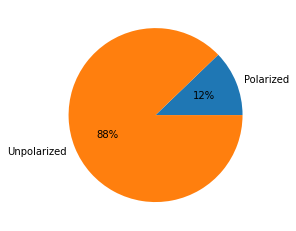

In [3]:
from matplotlib import pyplot as plt

num_polarized = len(comments[polarized])
# TODO: better word for "unpolarized"
# TODO: precision
plt.pie([num_polarized, len(comments) - num_polarized], labels=['Polarized', 'Unpolarized'], autopct='%.0f%%')
plt.show()

While this is, in itself, important information, we need to know whether this data lines up with the data reported by the Pew study so that we can determine whether our results make sense.

To perform this "sanity check", we must determine the makeup of the polarized posts.
We will create filter series for each individual keyword, rather than just one general `polarized` filter.


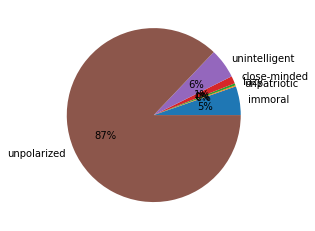

In [4]:
from keywords import load_syn, polarizing_phrases

# group the synonyms by their "root" keyword
keyword_synonyms = {keyword: [synonym for synonym in load_syn('../keywords', keyword)] for keyword in polarizing_phrases}

# create filters for each of the groupings
indices = {keyword: comments.apply(lambda row: contains(keyword_synonyms[keyword], row['body']), axis=1) for keyword in polarizing_phrases}

# plot each of the groupings this time
labels = polarizing_phrases + ['unpolarized'] # all the categories plus default category
# TODO: don't keep cycling colors
plt.pie([len(comments[indices[keyword]]) for keyword in polarizing_phrases] + [len(comments) - num_polarized], labels=labels, autopct='%.0f%%')
plt.show()

In this graph, there is a greater percentage of polarized posts than in the previous graph, despite being based on the same data. This discrepancy is due to the fact that searching for the presence of keywords independantly of each other allows posts with keywords from multiple categories to be counted more than once.

Since that data is still valid, let's make it more legible by removing the unpolarized category and focusing solely on the polarized subcategories.

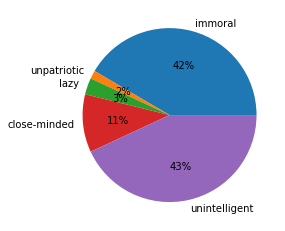

In [5]:
plt.pie([len(comments[indices[keyword]]) for keyword in polarizing_phrases], labels=polarizing_phrases, autopct='%.0f%%')
plt.show()

# Comparison

Let's see how this compares to the Pew Research data

TODO